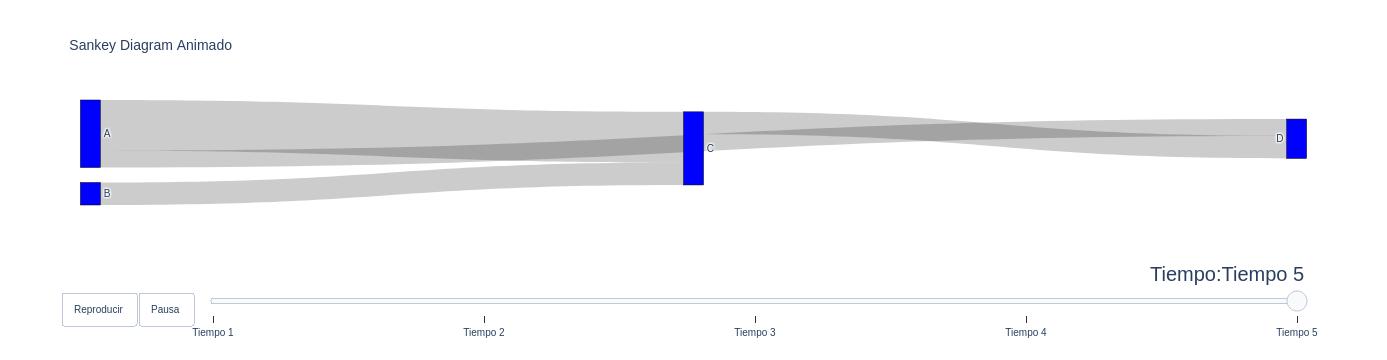

In [7]:
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.subplots import make_subplots

# Datos de ejemplo para tres momentos en el tiempo
labels = ['A', 'B', 'C', 'D']
values_t1 = [50, 20, 30, 10]
values_t2 = [40, 25, 25, 10]
values_t3 = [30, 30, 20, 20]
values_t4 = [35, 25, 20, 20]
values_t5 = [40, 25, 20, 15]
values_t6 = [45, 20, 15, 20]

# Crear figura base
fig = go.Figure()

# Agregar el primer trazo (estado inicial)
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=[0, 1, 0, 2],
        target=[2, 2, 3, 3],
        value=values_t1
    )
))

# Configurar la disposición y la animación
fig.update_layout(
    title_text="Sankey Diagram Animado",
    font_size=10,
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                    "label": "Reproducir",
                    "method": "animate",
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                    "label": "Pausa",
                    "method": "animate",
                },
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
        }
    ],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Tiempo:",
            "visible": True,
            "xanchor": "right",
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
    }],
)

# Definir los frames de la animación
frames = [
    go.Frame(
        data=[
            go.Sankey(
                node=dict(
                    pad=15,
                    thickness=20,
                    line=dict(color="black", width=0.5),
                    label=labels,
                    color="blue"
                ),
                link=dict(
                    source=[0, 1, 0, 2],
                    target=[2, 2, 3, 3],
                    value=values
                )
            )
        ],
        name=f'Tiempo {i+1}'
    )
    for i, values in enumerate([values_t2, values_t3, values_t4, values_t5, values_t6])
]

# Actualizar la figura con los frames de la animación
fig.frames = frames

# Actualizar el slider para que tenga la cantidad correcta de pasos
slider_steps = []
for i in range(len(frames)):
    step = {
        "args": [
            [f"Tiempo {i+1}"],
            {"frame": {"duration": 300, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}
        ],
        "label": f"Tiempo {i+1}",
        "method": "animate"
    }
    slider_steps.append(step)
fig.layout.sliders[0].steps = slider_steps

# Mostrar la visualización
offline.iplot(fig)


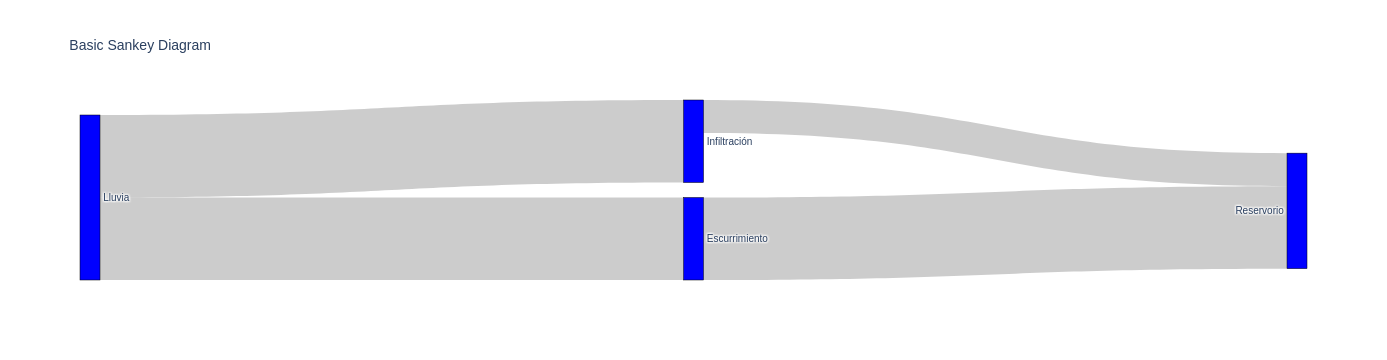

In [34]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Lluvia", "Infiltración", "Escurrimiento", "Reservorio"],
      color = "blue"
    ),
    link = dict(
      source = [0, 0, 1, 2], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [1, 2, 3, 3],
      value =  [5, 5, 2, 5]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

$$h_{ts}=\frac{h_m}{1+b_0e^{-b_1T_{\sum ts}}}$$

In [21]:
import numpy as np
import plotly.graph_objects as go

gdd = np.arange(0,10, 0.1)

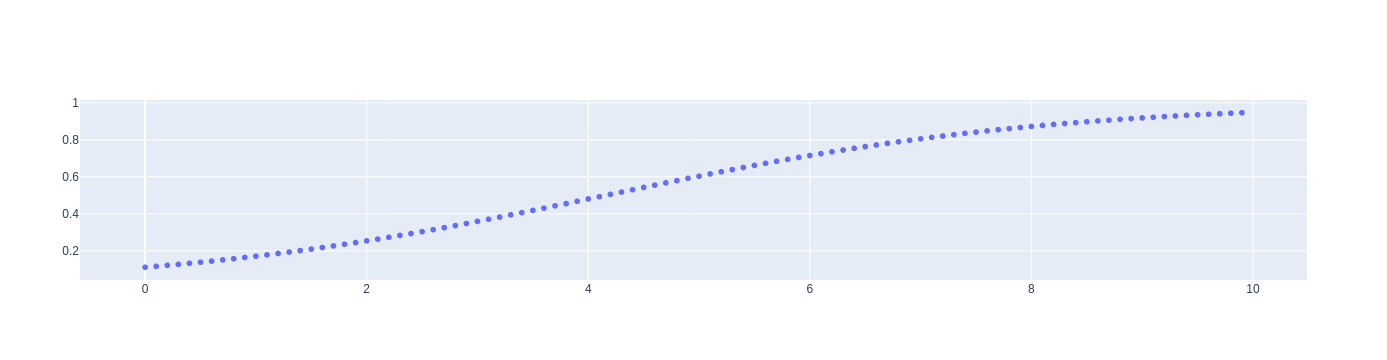

In [52]:
hm = 1
b0 = 8
b1 = 0.5

h = hm / (1 + b0*np.exp(-b1*gdd))

fig = go.Figure()
fig.add_trace(go.Scattergl(x=gdd, y=h, mode="markers"))